<a href="https://colab.research.google.com/github/Alex-5551/Agric-Trust/blob/main/Agriconnect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##AgriConnect Summit Hackathon - Bridging the Generational Divide



Import relevant libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [52]:
raw_data = pd.read_csv("/content/drive/MyDrive/A2F_2023_Revised.csv")
raw_data.head()

<ipython-input-52-0410ec5258b2>:1: DtypeWarning:

Columns (42,98,134,136,158,186,208,216,220,533,682,683,684,686,687,688,690,692,693,694,695,696,697,743,771,832,849,858,871,886,908,921,929,955,957,962,963,974,984,989,990,1001,1003,1012,1013,1015,1016,1018,1029,1032,1040,1041,1043,1044,1046,1069,1070,1085,1088,1099,1113,1130,1140,1146,1180,1210,1213,1215,1220,1239,1254,1268,1288,1291,1307,1318,1333,1353,1364,1376,1398,1450,1538) have mixed types. Specify dtype option on import or set low_memory=False.



,statecode,state_code,e6,state,agegroup,respondent_serial,Weightingvariable,final_hh_wgt,region,state_name,lga_name,locality_name,ea_name,sector,ea_code,ee1,hh_total_size_1,hh_total_size_2,hh_total_size_3,hh_age_15_17_1,hh_age_15_17_2,hh_age_15_17_3,hh_age_18_plus_1,hh_age_18_plus_2,hh_age_18_plus_3,q1_1,c1,c2a,c2b,c3a,c3b,c4,c5,d1,d2_1,d2_2,d2_3,d2_4,d2_5,d2_96,d2_95,d2_98,d2_other,d3_1,d3_2,d3_3,d3_4,d3_5,d3_6,d3_7,d3_8,d3_9,d3_10,d3_11,d3_12,d3_13,d3_14,d3_15,d3_16,d3_17,d3_18,d3_19,d3_20,d3_21,d3_22,d3_23,d3_24,d3_25,d4a_1,d4a_2,d4a_3,d4a_4,d4a_5,d4a_6,d4b,d5,d6,d7,d8a,d8b,d8c,d8d,d8e,d9a,d9b_1,d9b_2,d9b_3,d9b_4,d9b_5,d9b_6,d10,e1_1,e1_2,e1_3,e1_4,e1_5,e1_98,e1_6,e1_other,e2_1,e2_2,e2_3,e2_4,e2_5,e2_98,e2_6,e3,e4,e5,e7,e8,e9_1,e9_2,e9_3,e9_4,e9_5,e9_6,e9_7,e9_8,e9_9,e9_10,e9_11,e9_12,e9_13,e9_14,e9_15,e9_16,e9_17,e9_18,e9_19,e9_98,e9_other,e10,e11,e11_other,e12,e12_other,e13a_1,e13a_2,e13a_3,e13a_4,e13a_5,e13a_6,e13a_7,e13a_8,e13a_9,e13a_10,e13a_11,e13a_12,e13a_13,e13a_14,e13a_15,e13a_16,e13a_17,e13a_18,e13a_19,e13a_20,e13a_21,e13a_other,e13b,e13d_1,e13d_2,e13d_3,e13d_4,e13d_5,e13d_6,e13d_7,e14_1,e14_2,e14_3,e14_4,e14_5,e14_6,e14_7,e14_8,e14_9,e14_10,e14_11,e14_12,e14_13,e14_14,e14_15,e14_16,e14_17,e14_18,f3,f3_other,f4a_1,f4a_2,f4a_3,f4a_4,f4a_5,f4a_6,f4a_7,f4a_8,f4a_9,f4a_10,f4a_11,f4a_12,f4a_13,f4a_14,f4a_15,f4a_16,f4a_17,f4a_18,f4a_19,f4a_20,f4a_98,f4a_other,f4b,f5a,f5b,f5c,f6,f7a1,f7b,f7b_other,f7b1,f7c,f7d,f7d_other,f8_1,f8_2,f8_3,f8_4,f8_5,f8_6,f8_7,f8_8,f9,f10,f11,f12_1,f12_2,f12_3,f12_4,f14,f15,f16,f17,f18,f19,f20,f26,f27,f28,f29,f30,f31,qf1_1,qf1_2,qf1_16,qf1_3,qf1_4,qf1_5,qf1_6,qf1_7,qf1_8,qf1_9,qf1_10,qf1_11,qf1_12,qf1_13,qf1_14,qf1_15,qf1_17,qf2_1,qf2_2,qf2_16,qf2_3,qf2_4,qf2_5,qf2_6,qf2_7,qf2_8,qf2_9,qf2_10,qf3_1,qf3_2,qf3_16,qf3_3,qf3_4,qf3_5,qf3_6,qf3_7,qf3_8,qf3_9,qf3_10,qf3_11,qf3_12,qf3_13,qf3_14,qf3_15,qf4_1,qf4_2,qf4_16,qf4_3,qf4_4,qf4_5,qf4_6,qf4_7,qf4_8,qf4_9,qf4_10,qf4_11,qf4_12,qf4_13,qf4_14,qf4_15,qf5_1,qf5_2,qf5_16,qf5_3,qf5_4,qf5_5,qf5_6,qf5_7,qf5_8,qf5_9,qf5_10,qf5_11,qf5_12,qf5_13,qf5_14,qf5_15,qf6_1_1,qf6_1_2,qf6_1_3,qf6_1_4,qf6_1_5,qf6_1_6,qf6_1_7,qf6_1_8,qf6_1_9,qf6_1_10,qf6_1_11,qf6_1_12,qf6_1_13,qf6_1_14,qf6_1_15,qf6_2_1,qf6_2_2,qf6_2_3,qf6_2_4,qf6_2_5,qf6_2_6,qf6_2_7,qf6_2_8,qf6_2_9,qf6_2_10,qf6_2_11,qf6_2_12,qf6_2_13,qf6_2_14,qf6_2_15,qf6_16_1,qf6_16_2,qf6_16_3,qf6_16_4,qf6_16_5,qf6_16_6,qf6_16_7,qf6_16_8,qf6_16_9,qf6_16_10,qf6_16_11,qf6_16_12,qf6_16_13,qf6_16_14,qf6_16_15,qf6_3_1,qf6_3_2,qf6_3_3,qf6_3_4,qf6_3_5,qf6_3_6,qf6_3_7,qf6_3_8,qf6_3_9,qf6_3_10,qf6_3_11,qf6_3_12,qf6_3_13,qf6_3_14,qf6_3_15,qf6_4_1,qf6_4_2,qf6_4_3,qf6_4_4,qf6_4_5,qf6_4_6,qf6_4_7,qf6_4_8,qf6_4_9,qf6_4_10,qf6_4_11,qf6_4_12,qf6_4_13,qf6_4_14,qf6_4_15,qf6_5_1,qf6_5_2,qf6_5_3,qf6_5_4,qf6_5_5,qf6_5_6,qf6_5_7,qf6_5_8,qf6_5_9,qf6_5_10,qf6_5_11,qf6_5_12,qf6_5_13,qf6_5_14,qf6_5_15,qf6_6_1,qf6_6_2,qf6_6_3,qf6_6_4,qf6_6_5,qf6_6_6,qf6_6_7,qf6_6_8,qf6_6_9,qf6_6_10,qf6_6_11,qf6_6_12,qf6_6_13,qf6_6_14,qf6_6_15,qf6_7_1,qf6_7_2,qf6_7_3,qf6_7_4,qf6_7_5,qf6_7_6,qf6_7_7,qf6_7_8,qf6_7_9,qf6_7_10,qf6_7_11,qf6_7_12,qf6_7_13,qf6_7_14,qf6_7_15,qf6_8_1,qf6_8_2,qf6_8_3,qf6_8_4,qf6_8_5,qf6_8_6,qf6_8_7,qf6_8_8,qf6_8_9,qf6_8_10,qf6_8_11,qf6_8_12,qf6_8_13,qf6_8_14,qf6_8_15,qf6_9_1,qf6_9_2,qf6_9_3,qf6_9_4,qf6_9_5,qf6_9_6,qf6_9_7,qf6_9_8,qf6_9_9,qf6_9_10,qf6_9_11,qf6_9_12,qf6_9_13,qf6_9_14,qf6_9_15,qf6_10_1,qf6_10_2,qf6_10_3,qf6_10_4,qf6_10_5,qf6_10_6,qf6_10_7,qf6_10_8,qf6_10_9,qf6_10_10,qf6_10_11,qf6_10_12,qf6_10_13,qf6_10_14,qf6_10_15,qf7a_1,qf7a_2,qf7a_16,qf7a_3,qf7a_4,qf7a_5,qf7a_6,qf7a_7,qf7a_8,qf7a_9,qf7a_10,qf7a_11,qf7a_12,qf7a_13,qf7a_14,qf7a_15,qf7b_1,qf7b_2,qf7b_16,qf7b_3,qf7b_4,qf7b_5,qf7b_6,qf7b_7,qf7b_8,qf7b_9,qf7b_10,qf7b_11,qf7b_12,qf7b_13,qf7b_14,qf7b_15,qf8,qf9_1,qf9_2,qf9_3,qf9_4,qf9_5,qf9_6,qf9_7,qf9_8,qf9_9,qf9_98,qf9_other,qf10filt01,qf10filt02,qf10filt03,qf10filt04,qf10filt05,qf10filt06,qf10filt07,qf10filt08,qf10filt09,qf10filt10,qf10filt11,qf10filt12,qf10filt13,qf10filt14,qf10filt15,qf10filt16,qf10a_1,qf10a_2,qf10a_16,qf10a_

In [104]:
raw_data.shape

(28392, 1613)

## Data cleaning and Visualization

In [105]:
## A function to wrangle data
def wrangle(filepath):

    #read data into pandas dataframe
    raw_df = pd.read_csv(filepath)

    #subset to youths. Age: 18 to 25
    df = raw_df.query('(e7>=18) and (e7<=25)')

    #select relevant columns that impacts an individuals creditworthiness
    cols = ["state", "sector", "finhealth_resilience", "finhealth_access","finhealth_indicator_final", "cc1_3", "cc1_6",
        "finlit_knowledge", "e7", "e8","ie1b","lc1_1", "lc1a", "gen3_1", "banked", "e13a_1", "e14_17", "e14_15", "e14_3","e6",
        "gen3_7", "insurance_strand", "e14_11", "credit_strand", "saving_strand","investments_physical_assets", "investments_capital_markets", "f5b"]
    drop_cols = [col for col in df.columns if col not in cols]
    df = df.drop(columns = drop_cols)

   #drop missing rows subsetting by secctor of work(e13a_1, individuals who work in Agriculture, forestry & fishing) and debt(lc1a, level of debt)
    df = df.dropna(subset=["lc1a", "e13a_1"])

    #rename columns
    df.rename(columns={
        "e7":"Age",
        "e14_3":"Voters_card",
        "e8": "Edu_level",
        "e14_11": "BVN",
        "e14_15": "Tax_invoice",
        "e14_17":"Tax_cert",
        "f5b": "invest_freq",
        "lc1_1": "Borrowed_in_past",
        "ie1b":"Avg_income",
        "gen3_1": "Own_agri_land",
        "gen3_7": "Own_agri_mech_tool",
        "e6": "Gender",
        "cc1_3": "Drought_damage",
        "cc1_6": "Pest_infestation",
        "e13a_1": "work_agri_forestry_fishing",
        "lc1a": "Debt"
    }, inplace = True)


    #Changing 99 to a number like 4 falsely implies an ordinal or quantitative relationship that does not exist,
    #misleading the model into learning patterns that are not real.
    credit_map = {
    1: "Bank",
    2: "Other Formal",
    3: "Informal Only",
    4: "Family and Friends",
    99: "Not Borrowing"
      }

    df['source_of_borrowing'] = df['credit_strand'].map(credit_map)

    #mapping the insurance column
    insure_map = {99:"Not Insured", 1:"Insured"}
    df["insurance_strand"] = df["insurance_strand"].map(insure_map)

    #mapping the saving_strand column
    save_map = {1: "Saving at bank",
                2: "Non_bank formal channel",
                3: "Informal mechanisms",
                4: "At home only",
                99: "Not Saving"}
    df["saving_strand"] = df["saving_strand"].map(save_map)

    imputer = SimpleImputer(missing_values = np.nan,strategy = "most_frequent")
    df["Avg_income"] = imputer.fit_transform(df[["Avg_income"]])

    #convert from float to integer. Example age can't be float
    for col in df.columns:
        if df[col].dtype == "float":
            df[col] = df[col].astype("int")
        else:
           df[col] = df[col].astype("object")

    # change the ranking of some feature, to prevent the model assigning it excess weight( scaling)
    # 99 = not insured, 1 = insured

    insure_dict = {99:0, 1:1}

    df["insurance_strand"] = df["insurance_strand"].replace(insure_dict)


    save_dict = {1:1, 2:2, 3:3, 4:4, 99:0}
    df["saving_strand"] = df["saving_strand"].replace(save_dict)

    # reset index
    df  = df.reset_index(drop = True)

    return df

In [61]:
df = wrangle("/content/drive/MyDrive/A2F_2023_Revised.csv")
df.head()

<ipython-input-60-460db3f4af97>:5: DtypeWarning:

Columns (42,98,134,136,158,186,208,216,220,533,682,683,684,686,687,688,690,692,693,694,695,696,697,743,771,832,849,858,871,886,908,921,929,955,957,962,963,974,984,989,990,1001,1003,1012,1013,1015,1016,1018,1029,1032,1040,1041,1043,1044,1046,1069,1070,1085,1088,1099,1113,1130,1140,1146,1180,1210,1213,1215,1220,1239,1254,1268,1288,1291,1307,1318,1333,1353,1364,1376,1398,1450,1538) have mixed types. Specify dtype option on import or set low_memory=False.



,Gender,state,sector,Age,Edu_level,work_agri_forestry_fishing,Voters_card,BVN,Tax_invoice,Tax_cert,invest_freq,Borrowed_in_past,Debt,Drought_damage,Pest_infestation,Avg_income,Own_agri_land,Own_agri_mech_tool,banked,saving_strand,credit_strand,insurance_strand,investments_physical_assets,investments_capital_markets,finhealth_resilience,finhealth_access,finlit_knowledge,finhealth_indicator_final,source_of_borrowing
0,2,ABIA,1,25,4,0,1,2,2,2,2,2,2,2,2,2,2,3,2,Informal mechanisms,4,Not Insured,1,2,2,0,2,1,Family and Friends
1,1,ABIA,1,25,5,0,1,1,2,2,2,2,1,2,2,4,3,3,1,Saving at bank,3,Not Insured,2,2,0,2,2,1,Informal Only
2,2,ABIA,1,23,5,0,1,2,2,2,1,2,3,2,2,3,2,3,1,Saving at bank,4,Not Insured,1,2,1,0,2,1,Family and Friends
3,1,ABIA,1,23,5,0,1,1,2,2,3,2,2,2,2,2,3,3,1,Saving at bank,4,Not Insured,1,2,0,0,2,0,Family and Friends
4,1,ADAMAWA,2,25,5,1,1,1,2,2,2,1,1,2,2,2,2,3,2,Not Saving,4,Not Insured,1,2,0,0,0,1,Family and Friends


In [62]:
print(df.shape)
df.info()

(1055, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       1055 non-null   int64 
 1   state                        1055 non-null   object
 2   sector                       1055 non-null   int64 
 3   Age                          1055 non-null   int64 
 4   Edu_level                    1055 non-null   int64 
 5   work_agri_forestry_fishing   1055 non-null   int64 
 6   Voters_card                  1055 non-null   int64 
 7   BVN                          1055 non-null   int64 
 8   Tax_invoice                  1055 non-null   int64 
 9   Tax_cert                     1055 non-null   int64 
 10  invest_freq                  1055 non-null   int64 
 11  Borrowed_in_past             1055 non-null   int64 
 12  Debt                         1055 non-null   int64 
 13  Drought_damage        

In [63]:
df.shape

(1055, 29)

In [64]:
# encoding of Numeric variables for visualization
gender = df["Gender"].replace({1: "Male", 2: "Female"})


#own Agricultural land
own_agri=  df["Own_agri_land"].replace({1:"Own(in my name)",
                                        2:"Joint ownership",
                                        3:"Do no own"})


#Agricultural mechanical tools
mech_agri = df["Own_agri_mech_tool"].replace({
                                              1:"Own(in my name)",
                                              2:"Joint ownership",
                                              3:"Do no own"})

# Highest level of education
edu_level = df["Edu_level"].replace({1:"Pre-school",
    2: "Primary incomplete ",
    3:"Primary complete",
    4:"Secondary incomplete",
    5:"Secondary complete",
    6:"University/Polytechnic OND",
    7:"University/Polytechnic HND",
    8:"Post-university incomplete",
    9:"Post-university complete",
    10:"Non-formal education (e.g., Arabic/Quranic education)",
    11:"No education" })

#Income level
income_dict = {
    1:"Below N15,000 per month",
    2: "N15,001 - N35,000 per month",
    3:"N35001 - N55,000 per month",
    4: "N55,001 - N75,000 per month",
    5: "N75,001 - N95,000 per month",
    6: "N95,001 - N115,000 per month",
    7: "N115,001 - N135,000 per month",
    8: "N135,001 - N155,000 per month",
    9: "N155,001 - N175,000 per month",
    10: "N175,001 - N195,000 per month",
    11: "N195,001 - N215,000 per month ",
    12: "N215,001 - N235,000 per month",
    13: "N235,001 - N255,000 per month",
    14: "N255,001 - 275,000 per month",
    15: "N275,001 - 295,000 per month",
    16: "N295,001 - 315,000 per month",
    17: "Above N315,000 per month",
    18: "Refused",
    19: "Don't Know",
    20: "No income"
}

income_level = df["Avg_income"].replace(income_dict)

#Finlit_knowledge: Individuals who have awareness, understanding, and familiarity with financial concepts, products
fin_know = df["finlit_knowledge"].replace({0:"Low",
                                           1:"Moderate",
                                           2: "High"})
#fin_health indicator: An indicator that separates the population of a country into those who are financially healthy
#from those who are financially vulnerable
fin_indicator = df["finhealth_indicator_final"].replace({0:"Low(Financially Vulnerable)",
                                           1:"Moderate(Financially Coping)",
                                           2: "High(Financially Healthy)"})
#Experienced pest infestation
pest = df["Pest_infestation"].replace({1: "Yes", 2: "No"})
#Experienced Drought
drought = df["Drought_damage"].replace({1: "Yes", 2: "No"})

#Debt
debt = df["Debt"].replace({1: "Do not have any debt",
  2: "Have a manageable amount of debt",
  3: "Have a bit more debt than is manageable",
  4: "Have far more debt than is manageable"})

sector_df = df["sector"].replace({1: "urban", 2: "rural"})

In [65]:
fig = plt.figure(figsize = (15,10))
state_count = df["state"].value_counts()

fig = px.bar(df, y = "state", color=gender, title = "Number of young respondents per state")
fig.update_layout(xaxis_title = "Number of respondents", yaxis_title = "State")
fig.show();

<Figure size 1500x1000 with 0 Axes>

In [66]:
## Proportion of Youths in different sector
rural = sector_df.value_counts(normalize = True).iloc[0]
urban = sector_df.value_counts(normalize=True).iloc[1]
print(f"The proportion of youths in the rural sector is {rural: .1%}")
print(f"The proportion of youths in the urban sector is {urban: .1%}")

gender_count = gender.value_counts(normalize=True)
print(f"\nThe percentage of female youths is {gender_count.iloc[0]: .1%}")
print(f"The percentage of female youths is {gender_count.iloc[1]: .1%}")

indicator_count = fin_indicator.value_counts(normalize=True).sort_values()
print(f"\nThe percentage of financially venurable youths: {indicator_count.iloc[0]: .1%}")
print(f"The percentage of  financially coping youths: {indicator_count.iloc[1]: .1%}")
print(f"The percentage of  financially healthy youths: {indicator_count.iloc[2]: .1%}")

The proportion of youths in the rural sector is  56.3%
The proportion of youths in the urban sector is  43.7%

The percentage of female youths is  57.4%
The percentage of female youths is  42.6%

The percentage of financially venurable youths:  12.0%
The percentage of  financially coping youths:  30.4%
The percentage of  financially healthy youths:  57.5%


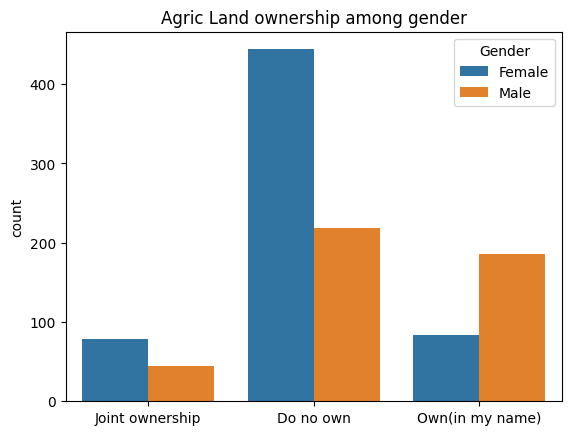

In [67]:
sns.countplot(df, x =own_agri,hue = gender)
plt.title("Agric Land ownership among gender")
plt.xlabel("");

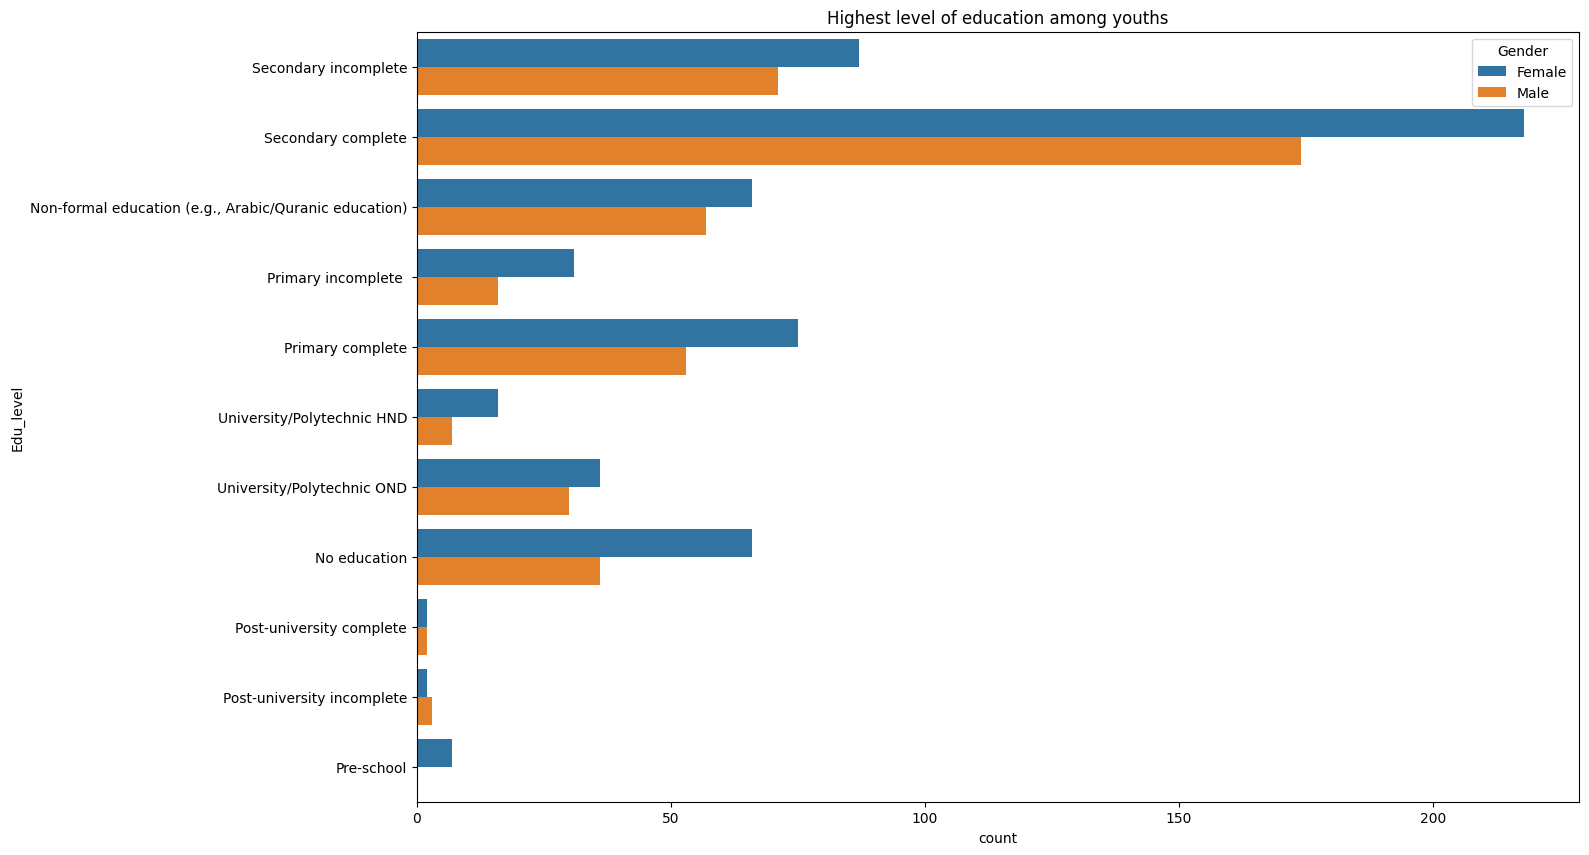

In [68]:
fig = plt.figure(figsize = (15,10))
sns.countplot(y=edu_level, hue = gender)
plt.title("Highest level of education among youths");

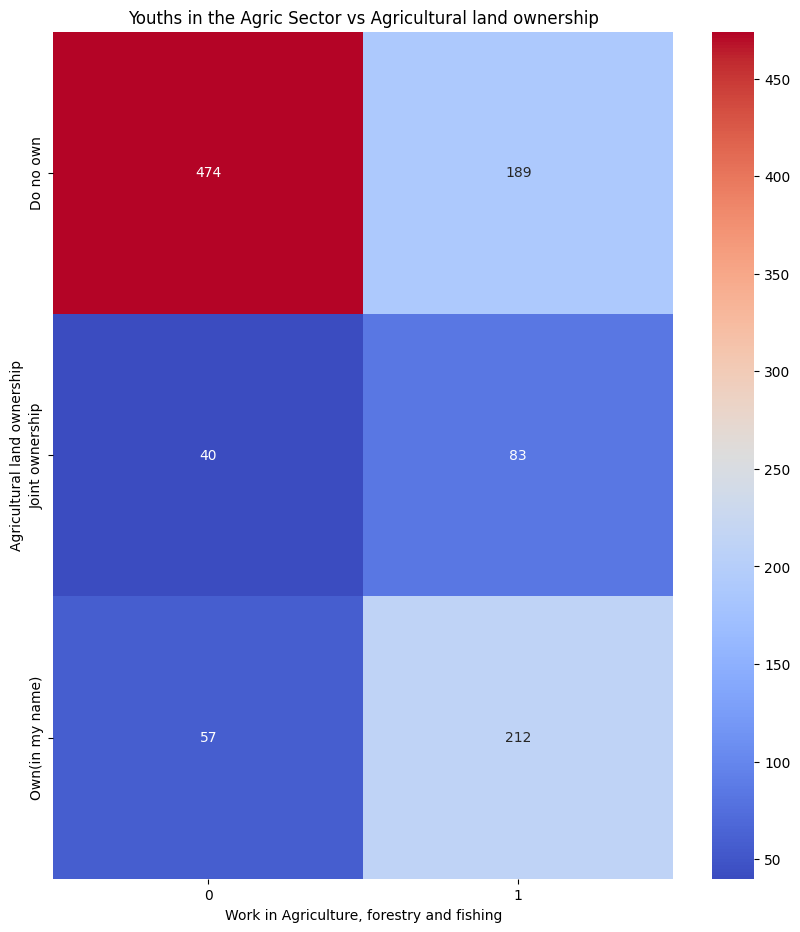

In [69]:
ct = pd.crosstab(index = own_agri, columns = df["work_agri_forestry_fishing"])
fig = plt.figure(figsize = (10,11))

sns.heatmap(ct, annot =True, cmap = "coolwarm", fmt = "d")
plt.title("Youths in the Agric Sector vs Agricultural land ownership")
plt.ylabel("Agricultural land ownership")
plt.xlabel("Work in Agriculture, forestry and fishing");

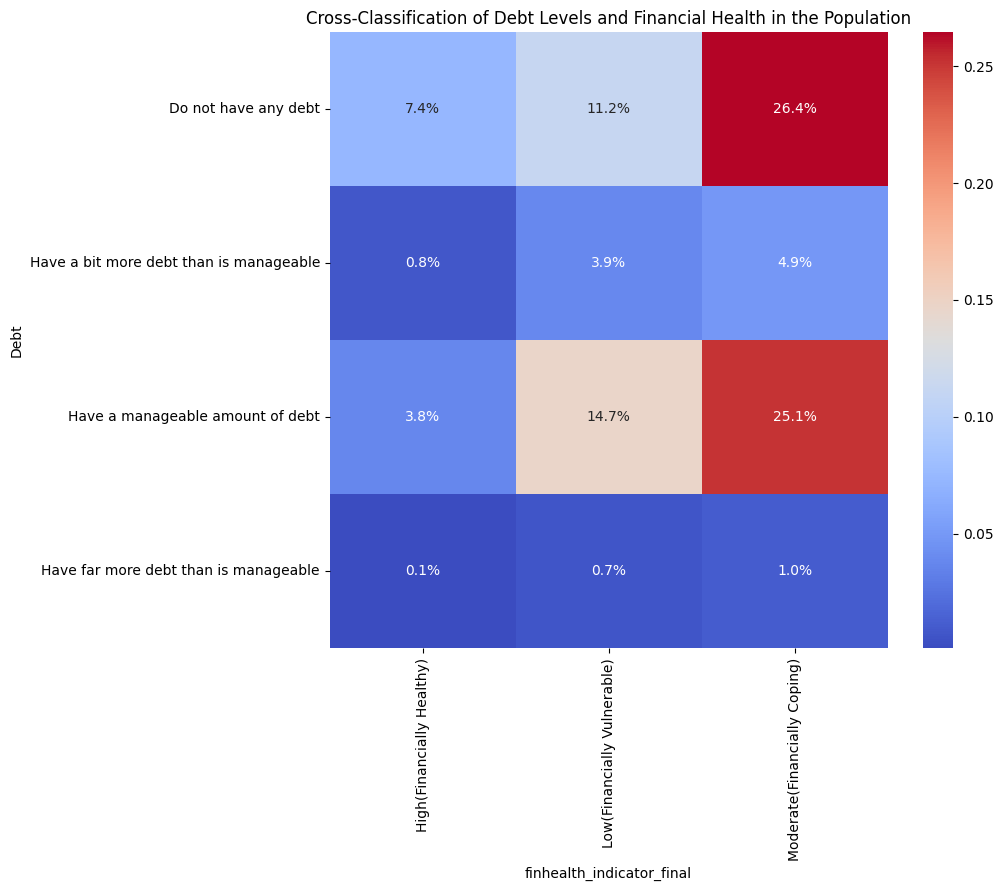

In [70]:
ct = pd.crosstab(index = debt, columns = fin_indicator)
ct_pct = ct/ct.values.sum()

fig = plt.figure(figsize = (9,8))
sns.heatmap(ct_pct, annot = True, cmap = "coolwarm", fmt = ".1%")
plt.title("Cross-Classification of Debt Levels and Financial Health in the Population");

97.8% of Nigeria youths don't have insurance

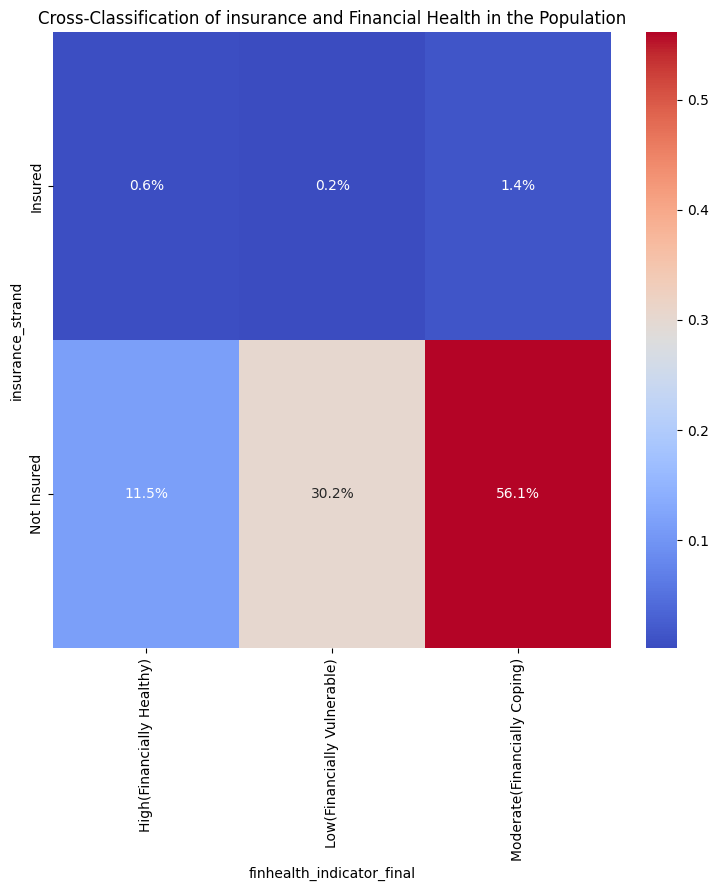

In [71]:
ct = pd.crosstab(index = df["insurance_strand"], columns = fin_indicator)
ct_pct = ct/ct.values.sum()

fig = plt.figure(figsize = (9,8))
sns.heatmap(ct_pct, annot = True, cmap = "coolwarm", fmt = ".1%")
plt.title("Cross-Classification of insurance and Financial Health in the Population");

In [72]:
tax_certi = df["Tax_cert"].replace({1: "Yes", 2: "No"})
tax_invoice = df["Tax_invoice"].replace({1: "Yes", 2: "No"})
voters_card = df["Voters_card"].replace({1: "Yes", 2: "No"})

tax_invoice_count = tax_certi.value_counts(normalize=True).sort_values()
print(f"Youths that have Local Govt rates and  tax invoice: {tax_invoice_count.iloc[0]: .1%}")
print(f"Youths that don't have Local Govt rates and  tax invoice: {tax_invoice_count.iloc[1]: .1%}")

tax_certi_count = tax_certi.value_counts(normalize=True).sort_values()
print(f"\nThe percentage of youths that have tax clearance certificate: {tax_certi_count.iloc[0]: .1%}")
print(f"The percentage of youths that don't have tax clearance certificate: {tax_certi_count.iloc[1]: .1%}")

Youths that have Local Govt rates and  tax invoice:  1.9%
Youths that don't have Local Govt rates and  tax invoice:  98.1%

The percentage of youths that have tax clearance certificate:  1.9%
The percentage of youths that don't have tax clearance certificate:  98.1%


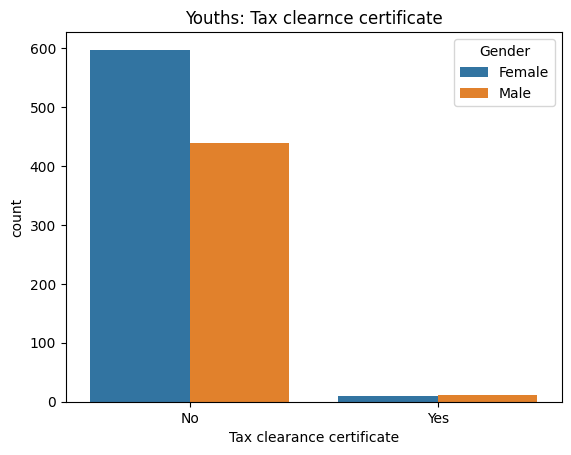

In [73]:
sns.countplot(x=tax_certi, hue = gender)
plt.title("Youths: Tax clearnce certificate")
plt.xlabel("Tax clearance certificate");

In [106]:
# High variance features: factors that increases a farmers "creditworthy."
df_var = df.drop(columns = ["state", "saving_strand", "insurance_strand", "source_of_borrowing"])
df_var.var().sort_values(ascending = False)

,0
Avg_income,35.367048
Edu_level,7.240911
Age,5.771996
finlit_knowledge,0.806421
Own_agri_land,0.744646
finhealth_resilience,0.577780
Debt,0.517068
credit_strand,0.416840
invest_freq,0.411195
finhealth_indicator_final,0.391201


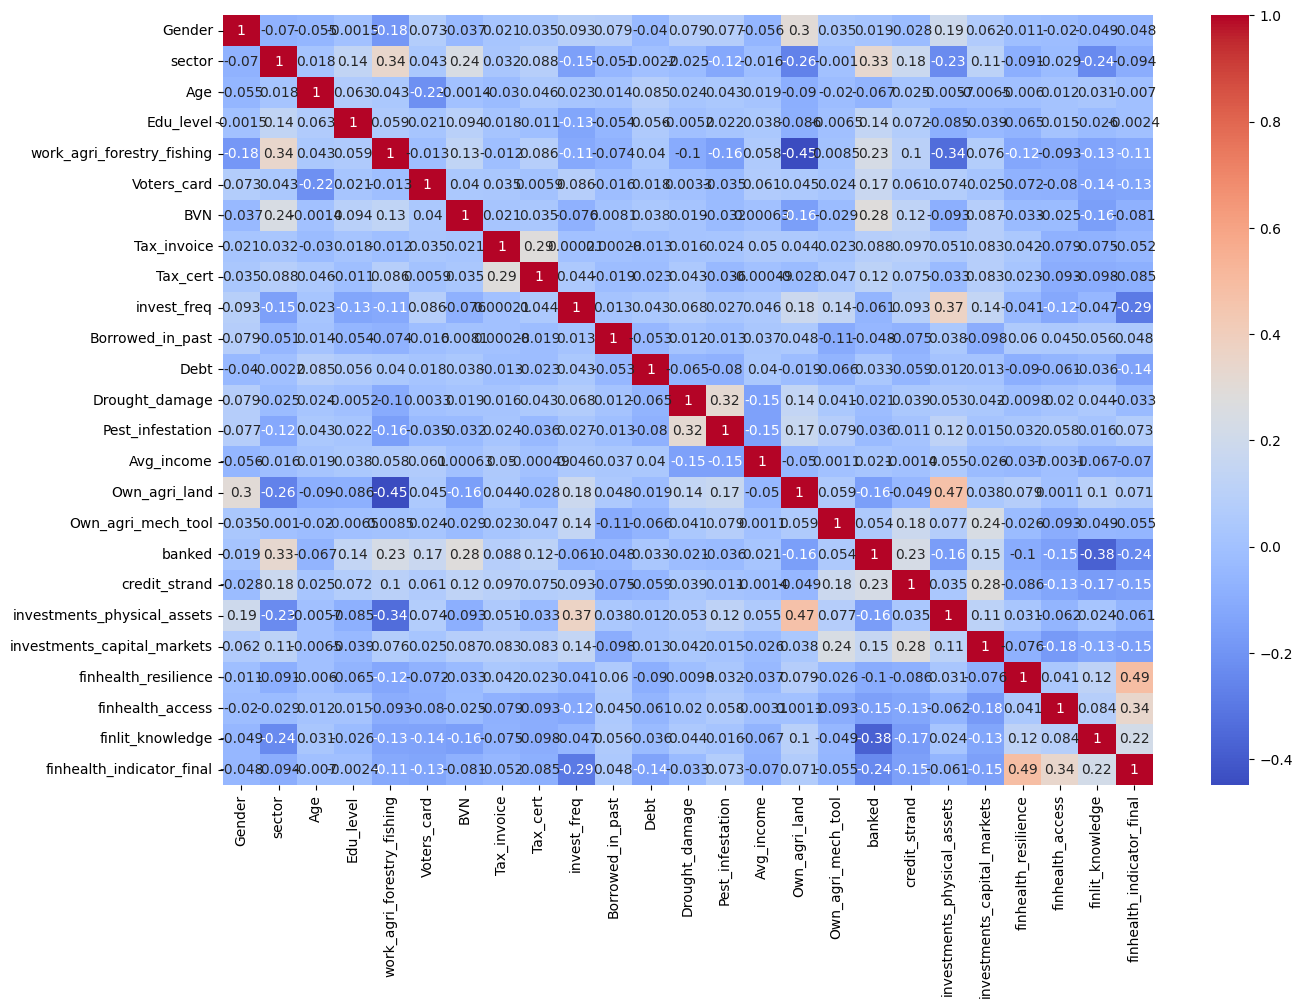

In [75]:
#check for correlation
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corr()

fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation, cmap = "coolwarm", annot = True);

## Machine learning model

## Clustering using Kmeans

In [76]:
# Encode categorical features
cols = ["banked", "insurance_strand", "source_of_borrowing", "saving_strand"]

for col in cols:
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])

In [77]:
#drop the gender and state column as we don't want access to finance to be biased by that
X = df.copy("deep")
X = X.drop(columns = ["state", "Gender"])

X.head()

,sector,Age,Edu_level,work_agri_forestry_fishing,Voters_card,BVN,Tax_invoice,Tax_cert,invest_freq,Borrowed_in_past,Debt,Drought_damage,Pest_infestation,Avg_income,Own_agri_land,Own_agri_mech_tool,banked,saving_strand,credit_strand,insurance_strand,investments_physical_assets,investments_capital_markets,finhealth_resilience,finhealth_access,finlit_knowledge,finhealth_indicator_final,source_of_borrowing
0,1,25,4,0,1,2,2,2,2,2,2,2,2,2,2,3,1,1,4,1,1,2,2,0,2,1,1
1,1,25,5,0,1,1,2,2,2,2,1,2,2,4,3,3,0,4,3,1,2,2,0,2,2,1,2
2,1,23,5,0,1,2,2,2,1,2,3,2,2,3,2,3,0,4,4,1,1,2,1,0,2,1,1
3,1,23,5,0,1,1,2,2,3,2,2,2,2,2,3,3,0,4,4,1,1,2,0,0,2,0,1
4,2,25,5,1,1,1,2,2,2,1,1,2,2,2,2,3,1,3,4,1,1,2,0,0,0,1,1


silhouette score for k: [np.float64(0.6275867232711332), np.float64(0.34975510821577993), np.float64(0.2955541340758573), np.float64(0.255423480749849), np.float64(0.2128592437385493), np.float64(0.212067534511405), np.float64(0.19354296242285454), np.float64(0.18847826483936247), np.float64(0.18491567717967625), np.float64(0.17238721210201913), np.float64(0.1683749012282481), np.float64(0.1702689996259123), np.float64(0.16269248339991282), np.float64(0.1498645254671168), np.float64(0.14845477293772605), np.float64(0.14985658620144637), np.float64(0.14405894075937237), np.float64(0.14626048584636958)]


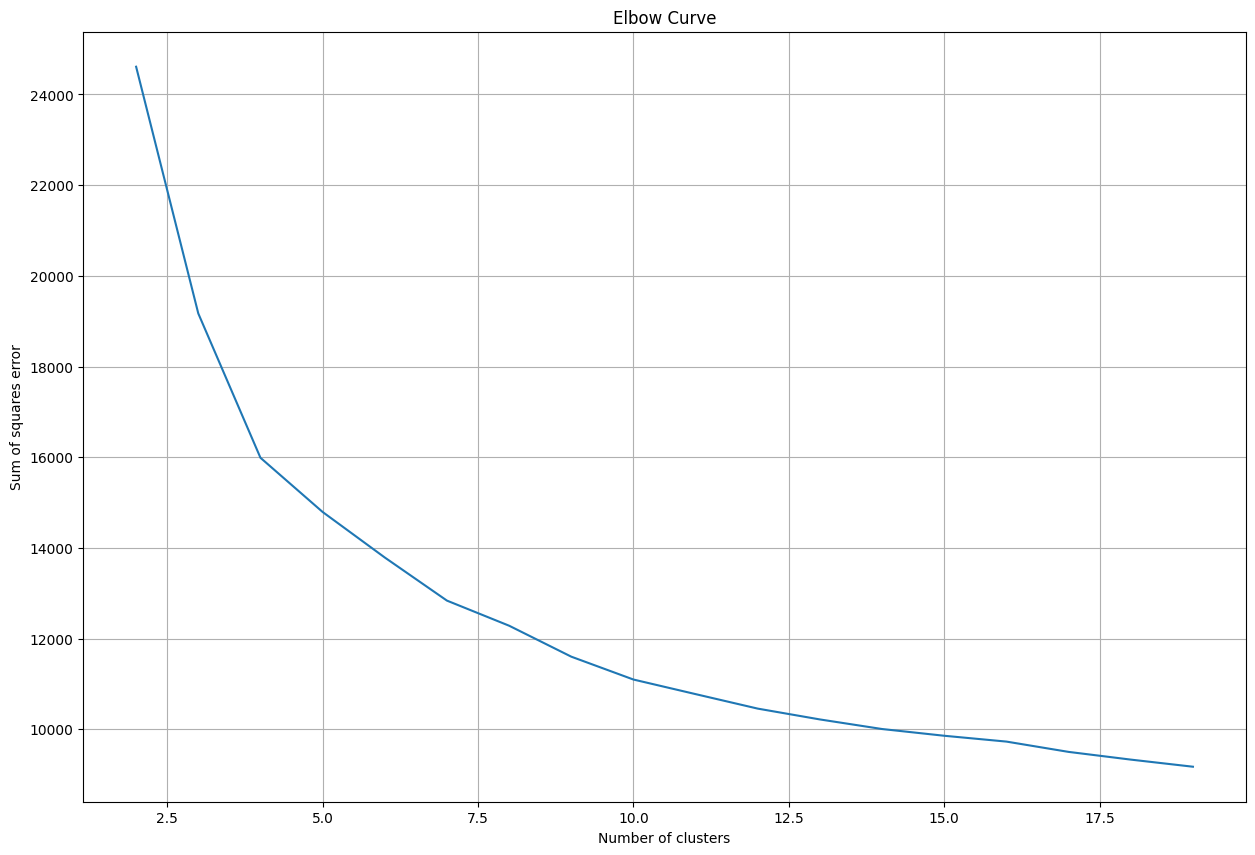

In [78]:
from sklearn import metrics
n_clusters= range(2, 20)

inertia_errors = []
silhouette_score = []
for i in n_clusters:
    model = KMeans(n_clusters=i, random_state=42,n_init = 10 )
    model.fit(X)

    inertia_errors.append(model.inertia_)
    score = metrics.silhouette_score(X, model.labels_, random_state = 42)
    silhouette_score.append(score)

print(f"silhouette score for k: {silhouette_score}")
fig = plt.figure(figsize = (15,10))

plt.plot(n_clusters, inertia_errors)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squares error")
plt.title("Elbow Curve")
plt.grid(True)
plt.show();

considering the silhoutte score of 0.627 for two clusters and the task at hand, which is a classification task, Two clusters will be used.

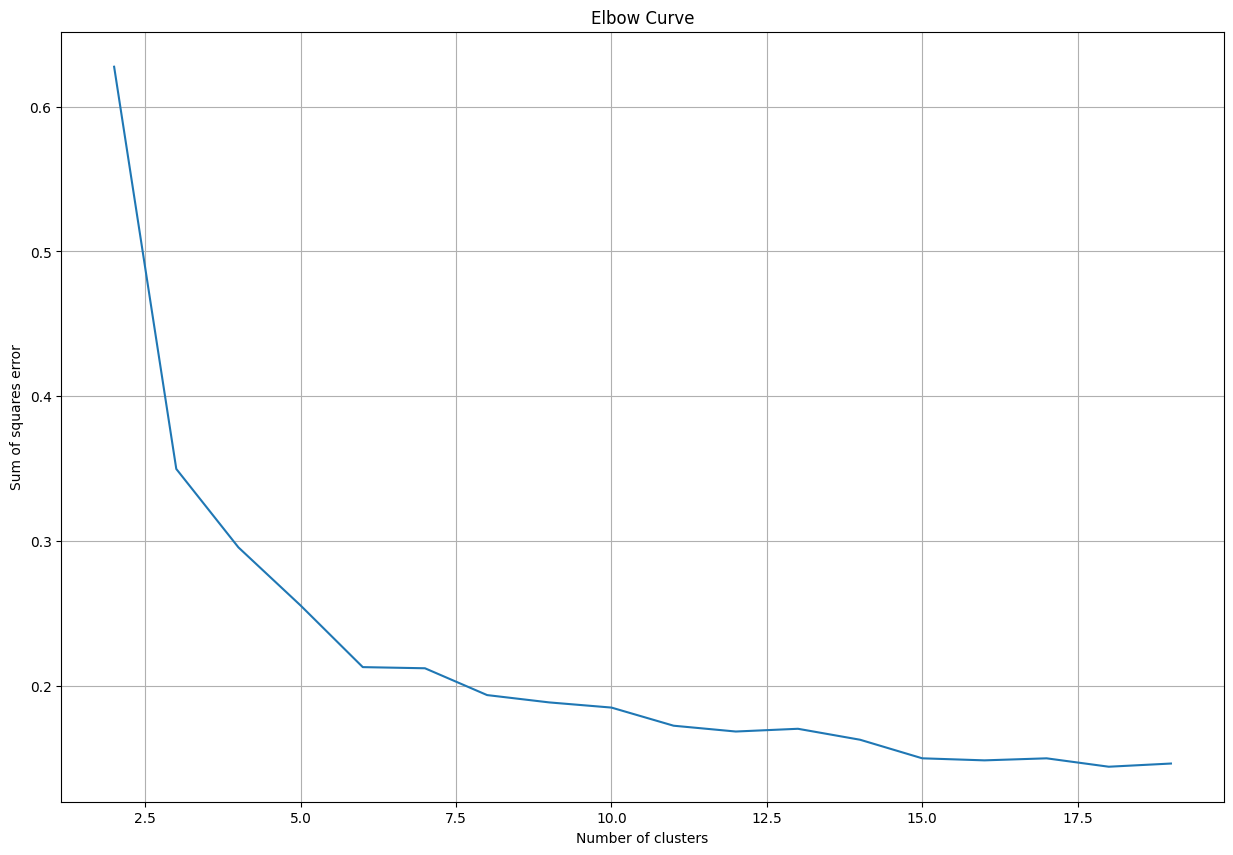

In [79]:
# silhouette score
fig = plt.figure(figsize=(15,10))
plt.plot(n_clusters, silhouette_score)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squares error")
plt.title("Elbow Curve")
plt.grid(True)
plt.show();

In [80]:
final_model = KMeans(n_clusters=2, verbose = 0, random_state=42, max_iter= 300, n_init = 10)
final_model.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [101]:
labels = final_model.labels_
group = X.groupby(labels).mean()

fig = px.bar(group, barmode="group", title = "Mean financial info of young farmers" )
fig.update_layout(xaxis_title = "Cluster", yaxis_title ="Value" )
fig.show();

Visualize the clusters using PCA

In [83]:
pca = PCA(n_components = 2, random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns = ["PC1","PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (1055, 2)


,PC1,PC2
0,-2.572251,-0.962594
1,-0.531927,-0.221213
2,-1.544259,-0.529300
3,-2.534085,-0.624341
4,-2.508039,0.028547


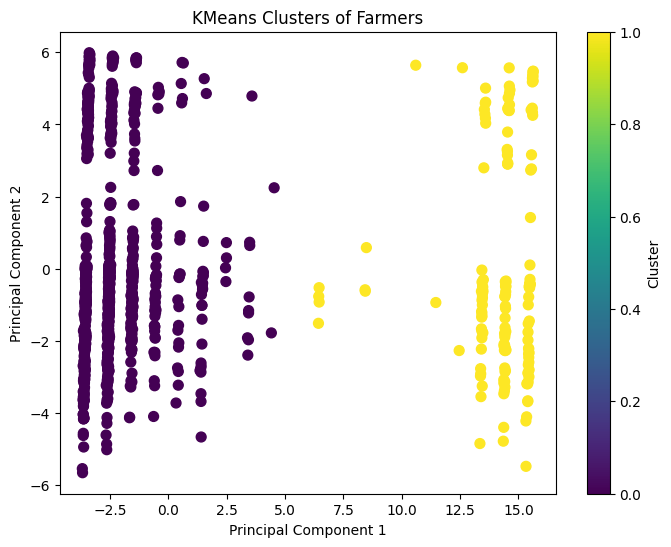

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=final_model.labels_, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters of Farmers')
plt.colorbar(label='Cluster')
plt.show()


In [86]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1', 'PC2'],
                        index=X.columns)
print(loadings.sort_values(by='PC1', ascending=False).head(15))

                                  PC1       PC2
Avg_income                   0.999441 -0.023406
Edu_level                    0.021534  0.965664
Age                          0.009611  0.245021
saving_strand                0.007706 -0.021652
work_agri_forestry_fishing   0.005020  0.014639
Debt                         0.005012  0.020081
Voters_card                  0.004939 -0.005003
invest_freq                  0.004915 -0.031447
investments_physical_assets  0.004551 -0.018623
Borrowed_in_past             0.002184 -0.007109
banked                       0.001938  0.025313
Tax_invoice                  0.001140  0.000487
insurance_strand             0.000468  0.001334
BVN                          0.000162  0.018485
Own_agri_mech_tool           0.000052 -0.001287


## Key Observations

1. Cluster 0 farmers have lower Income level and education comapared with cluster 1 farmers.

2. clutser 0 farmers experiences drought and pest infestation more than cluster 1 farmers.

3. Cluster 1 farmers have slightly more debt than those in Cluster 0.

In [87]:
# Get average feature values per cluster
pd.set_option('display.max_columns', None)
cluster_profiles = X.groupby(final_model.labels_).mean()
cluster_profiles


,sector,Age,Edu_level,work_agri_forestry_fishing,Voters_card,BVN,Tax_invoice,Tax_cert,invest_freq,Borrowed_in_past,Debt,Drought_damage,Pest_infestation,Avg_income,Own_agri_land,Own_agri_mech_tool,banked,saving_strand,credit_strand,insurance_strand,investments_physical_assets,investments_capital_markets,finhealth_resilience,finhealth_access,finlit_knowledge,finhealth_indicator_final,source_of_borrowing
0,1.559116,22.435359,5.699448,0.441989,1.355801,1.571271,1.977901,1.980110,2.387845,1.146961,1.669613,1.943646,1.879558,2.182320,2.387845,2.948066,0.503867,2.433149,3.690608,0.975691,1.420994,1.940331,0.541436,0.229834,1.002210,0.838674,1.216575
1,1.586667,22.453333,6.026667,0.560000,1.460000,1.600000,2.000000,1.986667,2.480000,1.173333,1.753333,1.846667,1.740000,18.686667,2.286667,2.960000,0.593333,2.466667,3.760000,0.993333,1.506667,1.946667,0.440000,0.193333,0.766667,0.680000,1.160000


In [88]:
#add  cluster column to the data
cluster_labels = final_model.labels_

df_work = X.copy("deep")
df_work["cluster"] = cluster_labels

df_work.head()

,sector,Age,Edu_level,work_agri_forestry_fishing,Voters_card,BVN,Tax_invoice,Tax_cert,invest_freq,Borrowed_in_past,Debt,Drought_damage,Pest_infestation,Avg_income,Own_agri_land,Own_agri_mech_tool,banked,saving_strand,credit_strand,insurance_strand,investments_physical_assets,investments_capital_markets,finhealth_resilience,finhealth_access,finlit_knowledge,finhealth_indicator_final,source_of_borrowing,cluster
0,1,25,4,0,1,2,2,2,2,2,2,2,2,2,2,3,1,1,4,1,1,2,2,0,2,1,1,0
1,1,25,5,0,1,1,2,2,2,2,1,2,2,4,3,3,0,4,3,1,2,2,0,2,2,1,2,0
2,1,23,5,0,1,2,2,2,1,2,3,2,2,3,2,3,0,4,4,1,1,2,1,0,2,1,1,0
3,1,23,5,0,1,1,2,2,3,2,2,2,2,2,3,3,0,4,4,1,1,2,0,0,2,0,1,0
4,2,25,5,1,1,1,2,2,2,1,1,2,2,2,2,3,1,3,4,1,1,2,0,0,0,1,1,0


## Classification using tree model
RANDOM FOREST CLASSIFIER

In [89]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score

In [90]:
# split data into feature matrix and target vectot
target = "cluster"
X = df_work.drop(columns = target, axis = 1)
y = df_work[target]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

Set a minimum performance benchmark for the model

In [91]:
#baseline model
acc_baseline = y_train.value_counts(normalize=True)
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: cluster
0    0.8649
1    0.1351
Name: proportion, dtype: float64


In [92]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Most frequent class baseline
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)

# Evaluate
print("Baseline Accuracy:", accuracy_score(y_test, y_dummy_pred))


Baseline Accuracy: 0.8293838862559242


In [93]:
clf = RandomForestClassifier(random_state = 42)

params = {
    "n_estimators": range(25,100,25),
    "max_depth": range(10,50,10),
    "min_samples_split": range(2,10,2)
}

model = GridSearchCV(
    clf,
    param_grid = params,
    n_jobs = -1,
    cv = 5
)

model.fit(X_train, y_train)

best = model.best_params_
print(f"Best parameter:{best} ")
model_accuracy = model.score(X_test, y_test)
print(f"\nRandom forest classifier accuracy: {model_accuracy}")

Best parameter:{'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 25} 

Random forest classifier accuracy: 1.0


Classification Report

In [94]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00        36

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



<Axes: >

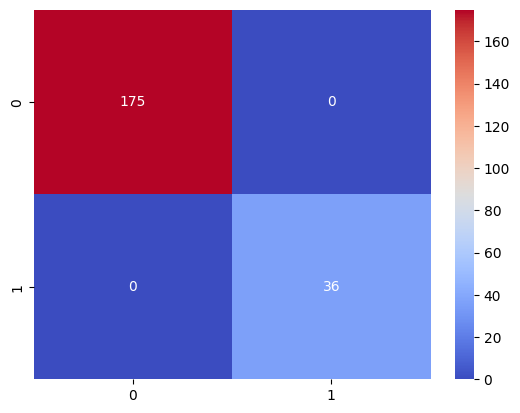

In [95]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = "coolwarm", annot = True, fmt = "g")

In [96]:
# import joblib
# joblib.dump(model, "model_RF.pkl")

GRADIENT BOOSTING CLASSIFIER

In [97]:
clf2 = GradientBoostingClassifier()

params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': range(10,50,10),
    "min_samples_split": range(2,10,2)
}

model2 = GridSearchCV(
    clf2,
    param_grid = params,
    n_jobs = -1,
    cv = 5
)

model2.fit(X_train,y_train)

model2_accuracy = model2.score(X_test,y_test)
print(f"Gradient Boosting Classifier accuracy: {model2_accuracy}")

Gradient Boosting Classifier accuracy: 1.0


In [98]:
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00        36

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



<Axes: >

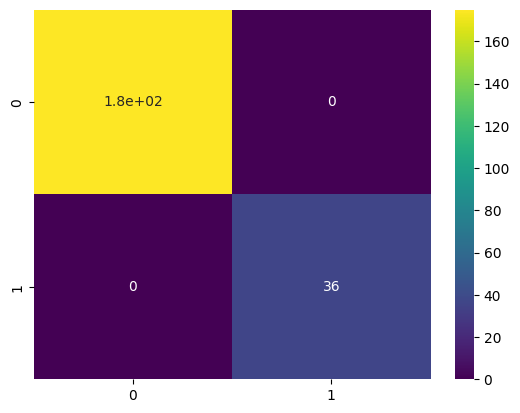

In [99]:
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot = True, cmap = "viridis")

In [100]:
# import joblib
# joblib.dump(model2, "model_GB.pkl")